In [2]:
INSTANCE_ID = '31bd9585-8cfe-4fa3-aa15-5f1b528ab12e'

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import datetime
import numpy as np

import matplotlib.pyplot as plt

In [5]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [6]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

# check the sample with different bands

In [7]:
# convert my geojson coors to wgs84 coord system
# https://mygeodata.cloud/converter/geojson-to-latlong
import pygeoj
testfile = pygeoj.load(filepath="./aoi.geojson")

# my wgs84 coordinates 
aoi_wgs84 = testfile.bbox
print(aoi_wgs84)

[79.96983110904694, 7.084400873410644, 79.97372031211853, 7.08574770774949]


In [8]:
betsiboka_bbox = BBox(bbox=aoi_wgs84, crs=CRS.WGS84)

## B11 B8 B2 RGB visualization

In [9]:
wms_request_agri = WmsRequest(layer='AGRICULTURE',
                        bbox=betsiboka_bbox,
                        time=('2017-01-01', '2017-01-31'),
                        width=960,
                       # maxcc=0.5,
                        image_format=MimeType.PNG,
                        instance_id=INSTANCE_ID,
                        time_difference=datetime.timedelta(hours=2))

img_array = wms_request_agri.get_data()
print('There are %d Sentinel-2 images available for December 2017.' % len(img_array))

There are 2 Sentinel-2 images available for December 2017.


In [10]:
print('These %d images were taken on the following dates:' % len(img_array))
for index, date in enumerate(wms_request_agri.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

These 2 images were taken on the following dates:
 - image 0 was taken on 2017-01-01 05:07:37
 - image 1 was taken on 2017-01-31 05:12:41


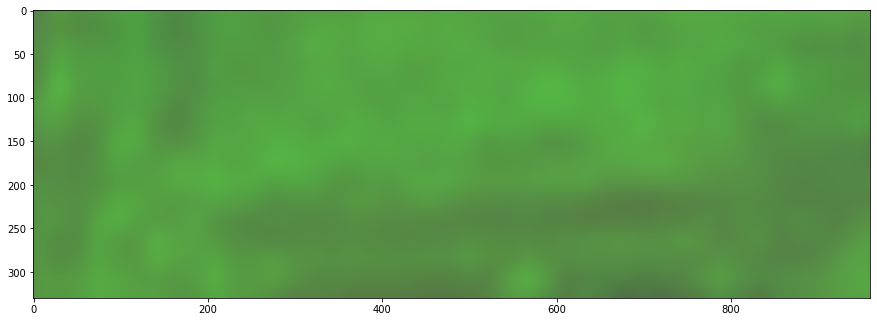

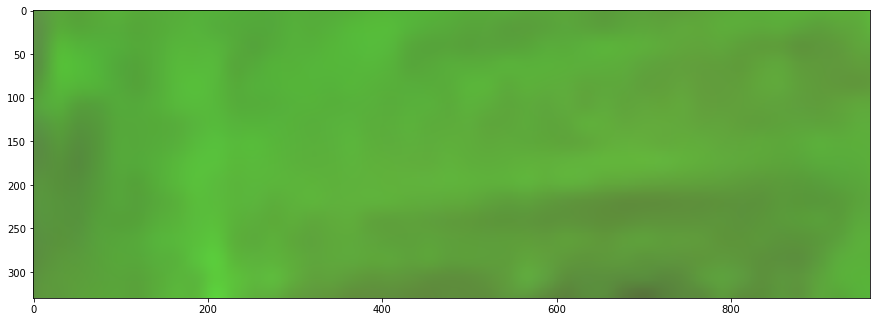

In [11]:
for i in range(0, len(img_array)):
    plot_image(img_array[i],2.5)

## B4 B3 B2 RGB visualization

In [12]:
wms_request_natural = WmsRequest(layer='TRUE_COLOR',
                        bbox=betsiboka_bbox,
                        time=('2017-01-01', '2017-01-31'),
                        width=960,
                       # maxcc=0.5,
                        image_format=MimeType.PNG,
                        instance_id=INSTANCE_ID,
                        time_difference=datetime.timedelta(hours=2))

img_array = wms_request_natural.get_data()
print('There are %d Sentinel-2 images available for December 2017.' % len(img_array))

There are 2 Sentinel-2 images available for December 2017.


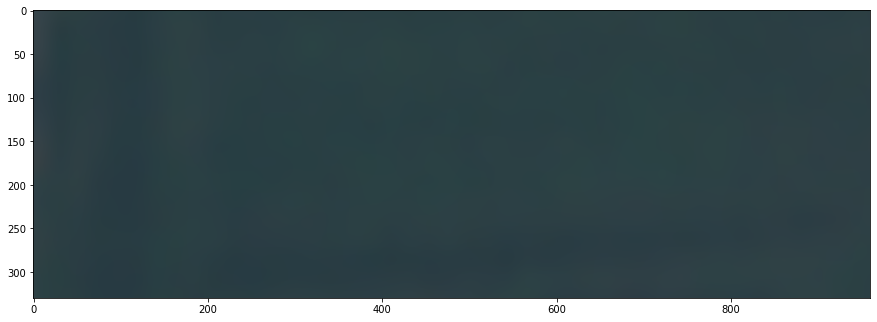

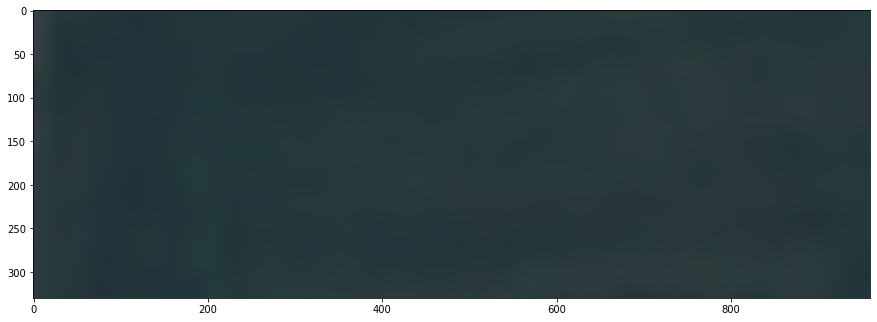

In [13]:
for i in range(0, len(img_array)):
    plot_image(img_array[i],2.5)

In [14]:
wms_request_natural = WmsRequest(layer='VEGITATION',
                        bbox=betsiboka_bbox,
                        time=('2017-01-01', '2017-01-31'),
                        width=960,
                       # maxcc=0.5,
                        image_format=MimeType.PNG,
                        instance_id=INSTANCE_ID,
                        time_difference=datetime.timedelta(hours=2))

img_array = wms_request_natural.get_data()
print('There are %d Sentinel-2 images available for December 2017.' % len(img_array))

There are 2 Sentinel-2 images available for December 2017.


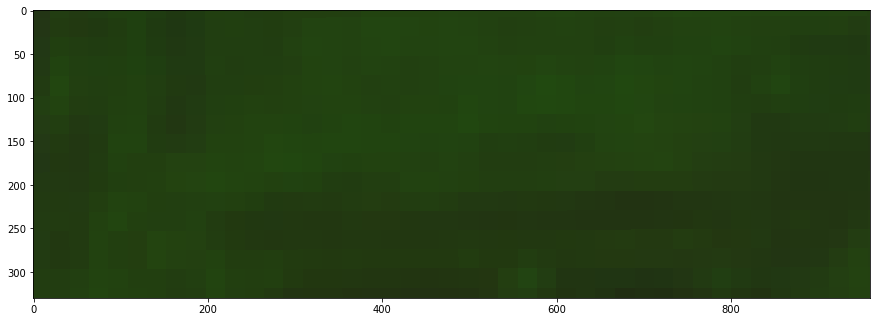

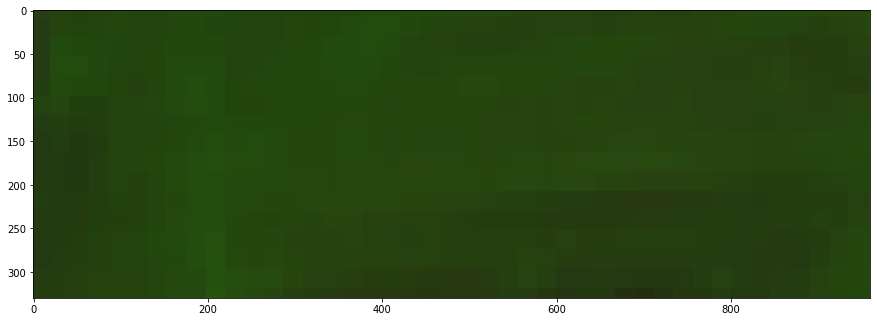

In [15]:
for i in range(0, len(img_array)):
    plot_image(img_array[i],2.5)

## download B11 B8 B2 to b11b8b2 folder

In [15]:
wms_b11b8b2 = WmsRequest(data_folder='b11b8b2-agriculture',
                                    layer='AGRICULTURE',
                                    bbox=betsiboka_bbox,
                                    time=('2015-01-01','2019-10-31'),
                                    width=960,
                                    image_format=MimeType.TIFF,
                                    instance_id=INSTANCE_ID,
                                    time_difference=datetime.timedelta(hours=2))

In [16]:
for index, date in enumerate(wms_b11b8b2.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

 - image 0 was taken on 2015-11-28 05:15:10
 - image 1 was taken on 2015-12-28 05:17:28
 - image 2 was taken on 2016-03-27 05:09:17
 - image 3 was taken on 2016-04-26 05:11:46
 - image 4 was taken on 2016-06-05 05:06:56
 - image 5 was taken on 2016-06-25 05:06:23
 - image 6 was taken on 2016-07-15 05:06:26
 - image 7 was taken on 2016-08-04 05:06:26
 - image 8 was taken on 2016-08-24 05:06:17
 - image 9 was taken on 2016-09-13 05:05:14
 - image 10 was taken on 2016-10-03 05:05:13
 - image 11 was taken on 2016-10-23 05:10:42
 - image 12 was taken on 2016-11-02 05:13:24
 - image 13 was taken on 2016-11-12 05:08:28
 - image 14 was taken on 2016-11-22 05:13:16
 - image 15 was taken on 2016-12-12 05:05:57
 - image 16 was taken on 2016-12-22 05:14:46
 - image 17 was taken on 2017-01-01 05:07:37
 - image 18 was taken on 2017-01-31 05:12:41
 - image 19 was taken on 2017-02-10 05:15:31
 - image 20 was taken on 2017-03-02 05:14:20
 - image 21 was taken on 2017-03-22 05:10:21
 - image 22 was take

In [17]:
%%time
wms_b11b8b2.save_data()

Wall time: 2min 23s


In [18]:
import os 
os.listdir('./b11b8b2-agriculture')

['wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.97372031211853_7.08574770774949_2015-11-28T05-15-10_960X330.tiff',
 'wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.97372031211853_7.08574770774949_2015-12-28T05-17-28_960X330.tiff',
 'wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.97372031211853_7.08574770774949_2016-03-27T05-09-17_960X330.tiff',
 'wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.97372031211853_7.08574770774949_2016-04-26T05-11-46_960X330.tiff',
 'wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.97372031211853_7.08574770774949_2016-06-05T05-06-56_960X330.tiff',
 'wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.97372031211853_7.08574770774949_2016-06-25T05-06-23_960X330.tiff',
 'wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.97372031211853_7.08574770774949_2016-07-15T05-06-26_960X330.tiff',
 'wms_AGRICULTURE_EPSG4326_79.96983110904694_7.084400873410644_79.973

## download B11 B8 B4 to b11b8b4 folder

In [19]:
wms_b11b8b4 = WmsRequest(data_folder='b11b8b4-agriAnalysis',
                                    layer='VEGITATION',
                                    bbox=betsiboka_bbox,
                                    time=('2015-01-01','2019-10-31'),
                                    width=960,
                                    image_format=MimeType.TIFF,
                                    instance_id=INSTANCE_ID,
                                    time_difference=datetime.timedelta(hours=2))

In [20]:
%%time
wms_b11b8b4.save_data()

Wall time: 108 ms


### download B4 B3 B2 to b4b3b2 folder

In [17]:
wms_b4b3b2 = WmsRequest(data_folder='b4b3b2-rgb',
                                    layer='TRUE_COLOR',
                                    bbox=betsiboka_bbox,
                                    time=('2015-01-01','2019-10-31'),
                                    width=960,
                                    image_format=MimeType.TIFF,
                                    instance_id=INSTANCE_ID,
                                    time_difference=datetime.timedelta(hours=2))

In [18]:
%%time
wms_b4b3b2.save_data()

Wall time: 1min 29s
